# Exercise 2

Work on this before the next lecture on 12 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to your GitHub repository for this course before the next lecture starts and post a link to your repository in [this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/3). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

# Question 1

Build your own random forest classifier! Using the `DecisionTreeClassifier` from scikit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) construct your own `RandomForestClassifier`.

There are two methods for adding randomisation to the tree growing process:

* grow each tree on a bootstrap sample of the data
* configure each tree to select a subset of features for each split

Try out your new `RandomForestClassifier` on the https://archive.ics.uci.edu/ml/datasets/bank+marketing dataset.

**Note:** To test your classifier it is a good idea to use a smaller dataset like the `make_blobs` from the lecture. It will run much faster and be easier to debug.

* Can you show that a forest of trees that are all the same performs like a single decision tree?
* Can you compute the correlation coefficient between scores assigned by two different trees in the forest? In order to gain from buildign a forest you want your trees to not be 100% correlated. Experiment with the different randomisation strategies to check that they work.

In [63]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=10,random_state=0,max_features="sqrt"), n_jobs=1, n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=True, random_state=1)
clf.fit(X_train, y_train)
print("Train score", clf.score(X_train, y_train))
print("Test score", clf.score(X_test, y_test))

for n, tree in zip(range(3), clf.estimators_):
    print("Prediction by tree %i\n" % n, tree.predict_proba(X_test[:5,:]))
print("Prediction by forest", clf.predict_proba(X_test[:5,:]))
clf.predict(X_test[:5,:])

Train score 0.8633333333333333
Test score 0.75
Prediction by tree 0
 [[0.11111111 0.88888889]
 [0.17391304 0.82608696]
 [0.09090909 0.90909091]
 [0.89583333 0.10416667]
 [0.83870968 0.16129032]]
Prediction by tree 1
 [[0.12820513 0.87179487]
 [0.90322581 0.09677419]
 [0.         1.        ]
 [1.         0.        ]
 [0.88571429 0.11428571]]
Prediction by tree 2
 [[0.14285714 0.85714286]
 [0.69565217 0.30434783]
 [0.28       0.72      ]
 [0.9375     0.0625    ]
 [0.28       0.72      ]]
Prediction by forest [[0.4148744  0.5851256 ]
 [0.48568735 0.51431265]
 [0.10788269 0.89211731]
 [0.84489522 0.15510478]
 [0.80828753 0.19171247]]


array(['r', 'r', 'r', 'b', 'b'], dtype='<U1')

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=10,random_state=0,max_features=1.0), n_jobs=1, n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=False, random_state=0)
clf.fit(X_train, y_train)
print("Train score", clf.score(X_train, y_train))
print("Test score", clf.score(X_test, y_test))

#for n, tree in zip(range(5), clf.estimators_):
#    print("Prediction by tree %i\n" % n, tree.predict_proba(X_test[:5,:]))
print("Prediction by forest", clf.predict_proba(X_test[:5,:]))
#clf.predict(X_test[:5,:])

clf = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0,max_features=1.0)
clf.fit(X_train, y_train)
print("Prediction by single tree", clf.predict_proba(X_test[:5,:]))

Train score 0.8266666666666667
Test score 0.7
Prediction by forest [[0.35087719 0.64912281]
 [0.72881356 0.27118644]
 [0.         1.        ]
 [0.84210526 0.15789474]
 [0.875      0.125     ]]
Prediction by single tree [[0.35087719 0.64912281]
 [0.72881356 0.27118644]
 [0.         1.        ]
 [0.84210526 0.15789474]
 [0.875      0.125     ]]


A forest of identical trees predicts the same as a single tree.

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
dataframe = pd.read_csv('/Users/sararicco/Downloads/bank-additional/bank-additional-full.csv',sep=';',header=None,low_memory=False)
data = dataframe.values
features = data[0,:20]
output = data[0,20:]
X_features = data[1:,:20]
y_output = np.ravel(le.fit_transform(data[1:,20:].ravel()))

for m in [1,2,3,4,5,6,7,8,9,14]: 
    X_features[:,m] = le.fit_transform(data[1:,m])
        
#print(X_features[:,:])
#print(y_output)
                             
X_train, X_test, y_train, y_test = train_test_split(X_features, y_output, random_state=0)
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=10,random_state=0,max_features="sqrt"), n_jobs=1, n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=False, random_state=0)
clf.fit(X_train, y_train)
print("Train score", clf.score(X_train, y_train))
print("Test score", clf.score(X_test, y_test))

Train score 0.9046000453206435
Test score 0.9023016412547344


# Question 2

Use the ready made `RandomForestClassifier` from scikit-learn to create the best model you can for the Bank Marketing dataset. Use `GridSearchCV` (or any other method) to tune your model and possible pre-processing steps. Make sure you have a test set to use after you are done tuning to estimate your generalisation error.

In [200]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils import validation

le = preprocessing.LabelEncoder()
dataframe = pd.read_csv('/Users/sararicco/Downloads/bank-additional/bank-additional-full.csv',sep=';',header=None,low_memory=False)
data = dataframe.values
features = data[0,:20]
output = data[0,20:]
X_features = data[1:,:20]
y_output = le.fit_transform(data[1:,20:].ravel())

for m in [1,2,3,4,5,6,7,8,9,14]: 
    X_features[:,m] = le.fit_transform(data[1:,m])

X_train, X_test, y_train, y_test = train_test_split(X_features, y_output, random_state=0)    
param_grid = {'max_leaf_nodes':range(2, 51, 8),
              'max_depth':range(1, 20, 5), 
              'min_samples_split':range(2, 5)} 
grid = GridSearchCV(RandomForestClassifier(n_estimators=100,random_state=0),
                    param_grid=param_grid,
                    cv=10,
                    return_train_score=True)
                    #scoring='roc_auc')

grid.fit(X_train,y_train) 
#scores = pd.DataFrame(grid.cv_results_)
print(grid.best_score_)
print(grid.best_params_) 

0.9095529442232365
{'max_depth': 16, 'max_leaf_nodes': 50, 'min_samples_split': 3}


In [204]:
grid.best_estimator_.score(X_test,y_test)

0.9080314654753812

# Question 3

Compare the feature importances calculated by a `RandomForestClassifier`, `ExtraTreesClassifier` and `GradientBoostedTreesClassifier` on the california housing dataset. You might have to tune `n_estimators` and other hyper-parameters to get good performance.

Plot each of the features as a scatter plot with the target to learn about each variable. You can also make a plot of two features and use the target as colour.

Fit a model and tune the model complexity using a training and test data set.

Explore the feature importances and partial dependences that are important to the house price.

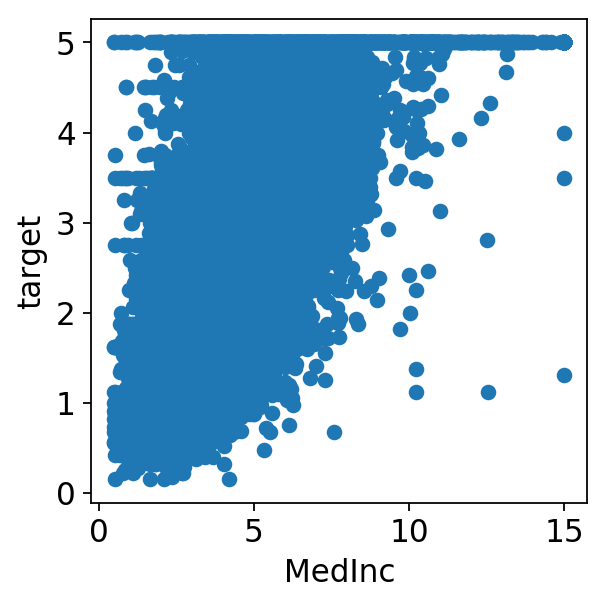

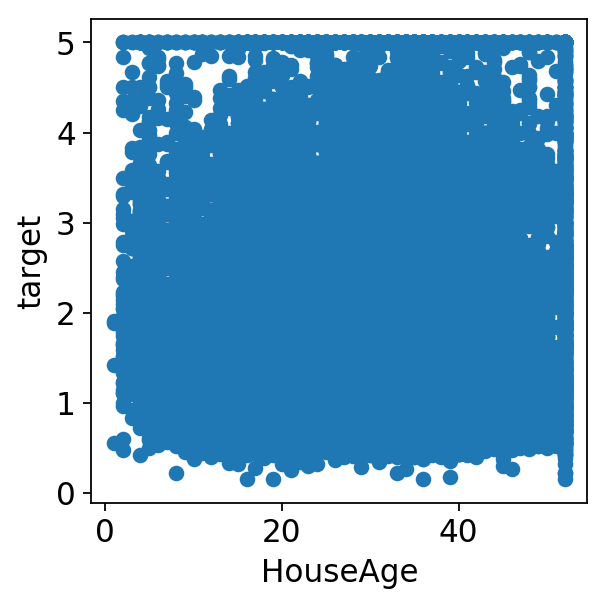

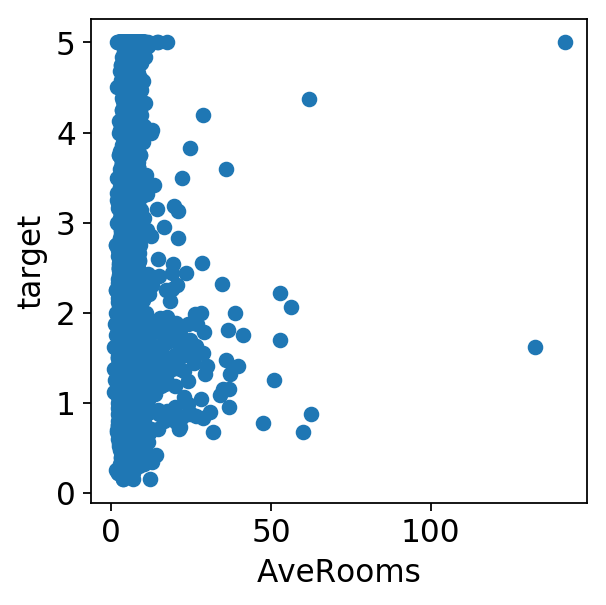

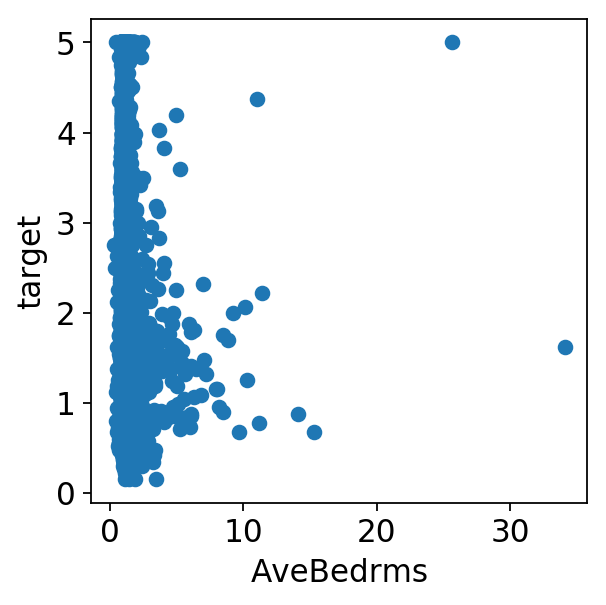

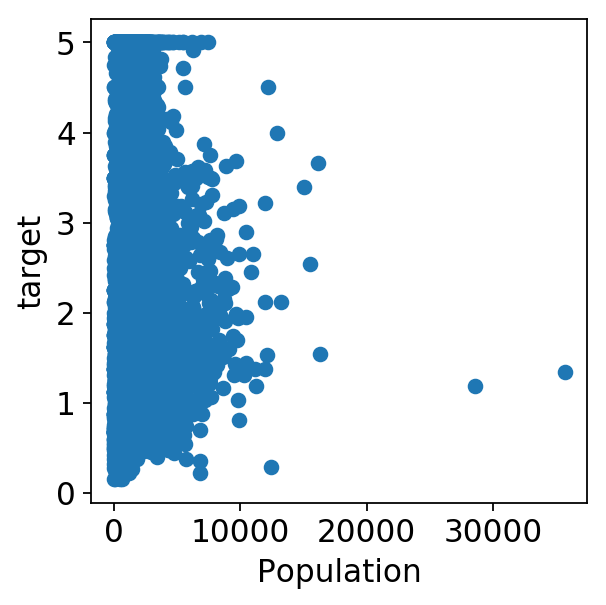

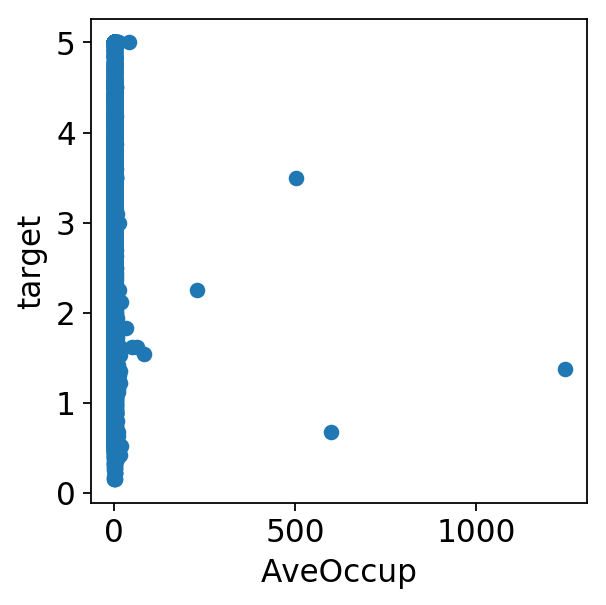

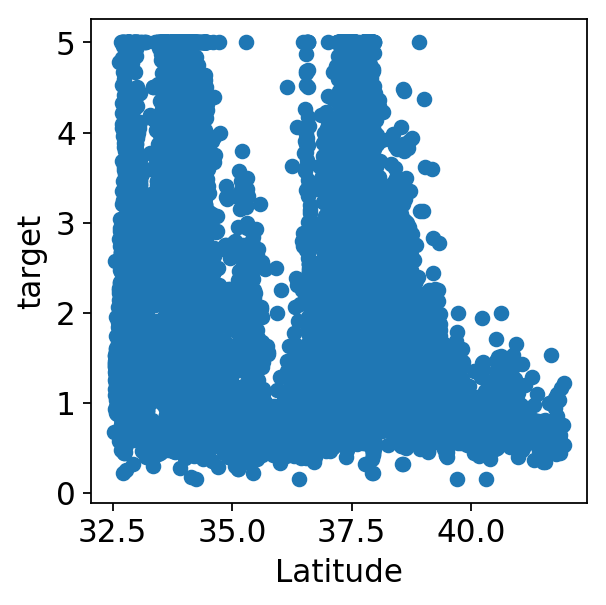

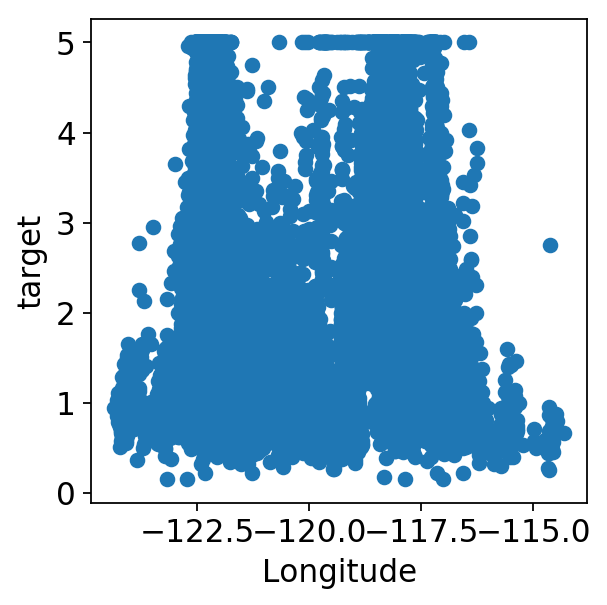

In [213]:
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()

for n,feature_name in enumerate(cal_housing.feature_names):
    plt.figure(figsize=(4, 4), dpi=80)
    plt.scatter(np.ravel(cal_housing.data[:, n]),cal_housing.target)
    plt.xlabel(feature_name)
    plt.ylabel('target')

features = cal_housing.data
target = cal_housing.target

In [216]:
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=0)  

param_distributions = {'max_leaf_nodes':np.arange(2, 51, 8),
              'max_depth':np.arange(1, 20, 5), 
              'max_features':np.arange(1, 9)} 
grid_RF=RandomizedSearchCV(RandomForestRegressor(n_estimators=100,bootstrap=True),param_distributions=param_distributions,cv=7)
grid_RF.fit(X_train,y_train)

RandomizedSearchCV(cv=7, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_leaf_nodes': array([ 2, 10, 18, 26, 34, 42, 50]), 'max_depth': array([ 1,  6, 11, 16]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, 8])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [226]:
print("best parameters", grid_RF.best_params_)
print("best score", grid_RF.best_score_)
print("train score", grid_RF.best_estimator_.score(X_train,y_train))
print("test score", grid_RF.best_estimator_.score(X_test,y_test))

best parameters {'max_leaf_nodes': 50, 'max_features': 2, 'max_depth': 16}
best score 0.7154016944916481
train score 0.7405827138303034
test score 0.7133196836449914


In [227]:
grid_ET=RandomizedSearchCV(ExtraTreesRegressor(n_estimators=100,bootstrap=True),param_distributions=param_distributions,cv=7)
grid_ET.fit(X_train,y_train)

RandomizedSearchCV(cv=7, error_score='raise',
          estimator=ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_leaf_nodes': array([ 2, 10, 18, 26, 34, 42, 50]), 'max_depth': array([ 1,  6, 11, 16]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, 8])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [228]:
print("best parameters", grid_ET.best_params_)
print("best score", grid_ET.best_score_)
print("train score", grid_ET.best_estimator_.score(X_train,y_train))
print("test score", grid_ET.best_estimator_.score(X_test,y_test))

best parameters {'max_leaf_nodes': 50, 'max_features': 6, 'max_depth': 11}
best score 0.6670363731276219
train score 0.67244098872469
test score 0.6468568747197038


In [230]:
grid_GB=RandomizedSearchCV(GradientBoostingRegressor(n_estimators=100),param_distributions=param_distributions,cv=7)
grid_GB.fit(X_train,y_train)

RandomizedSearchCV(cv=7, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_leaf_nodes': array([ 2, 10, 18, 26, 34, 42, 50]), 'max_depth': array([ 1,  6, 11, 16]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, 8])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [231]:
print("best parameters", grid_GB.best_params_)
print("best score", grid_GB.best_score_)
print("train score", grid_GB.best_estimator_.score(X_train,y_train))
print("test score", grid_GB.best_estimator_.score(X_test,y_test))

best parameters {'max_leaf_nodes': 34, 'max_features': 5, 'max_depth': 16}
best score 0.8302908401447272
train score 0.9004071065190274
test score 0.8300577352411891


<BarContainer object of 8 artists>

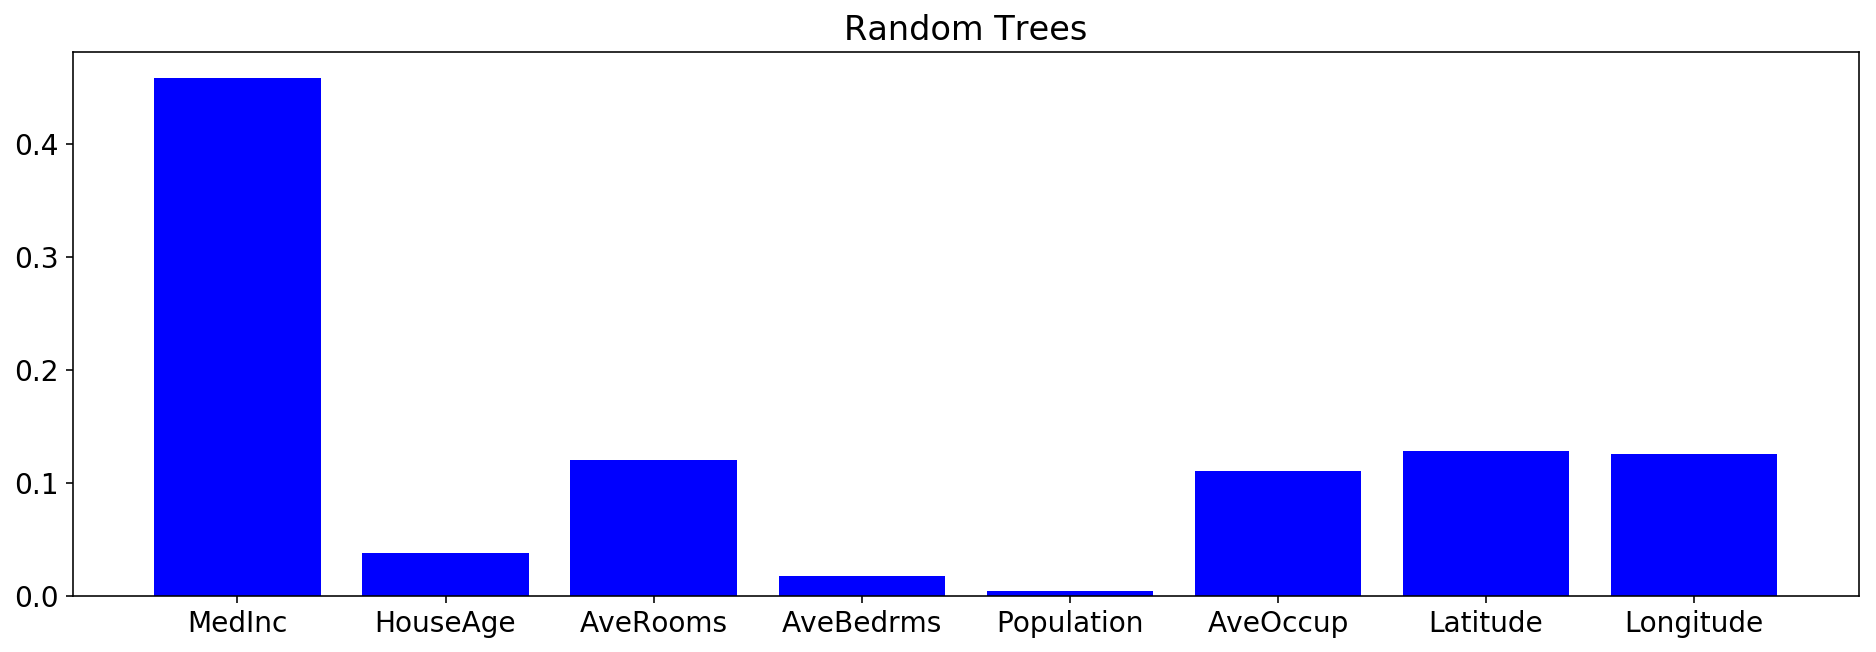

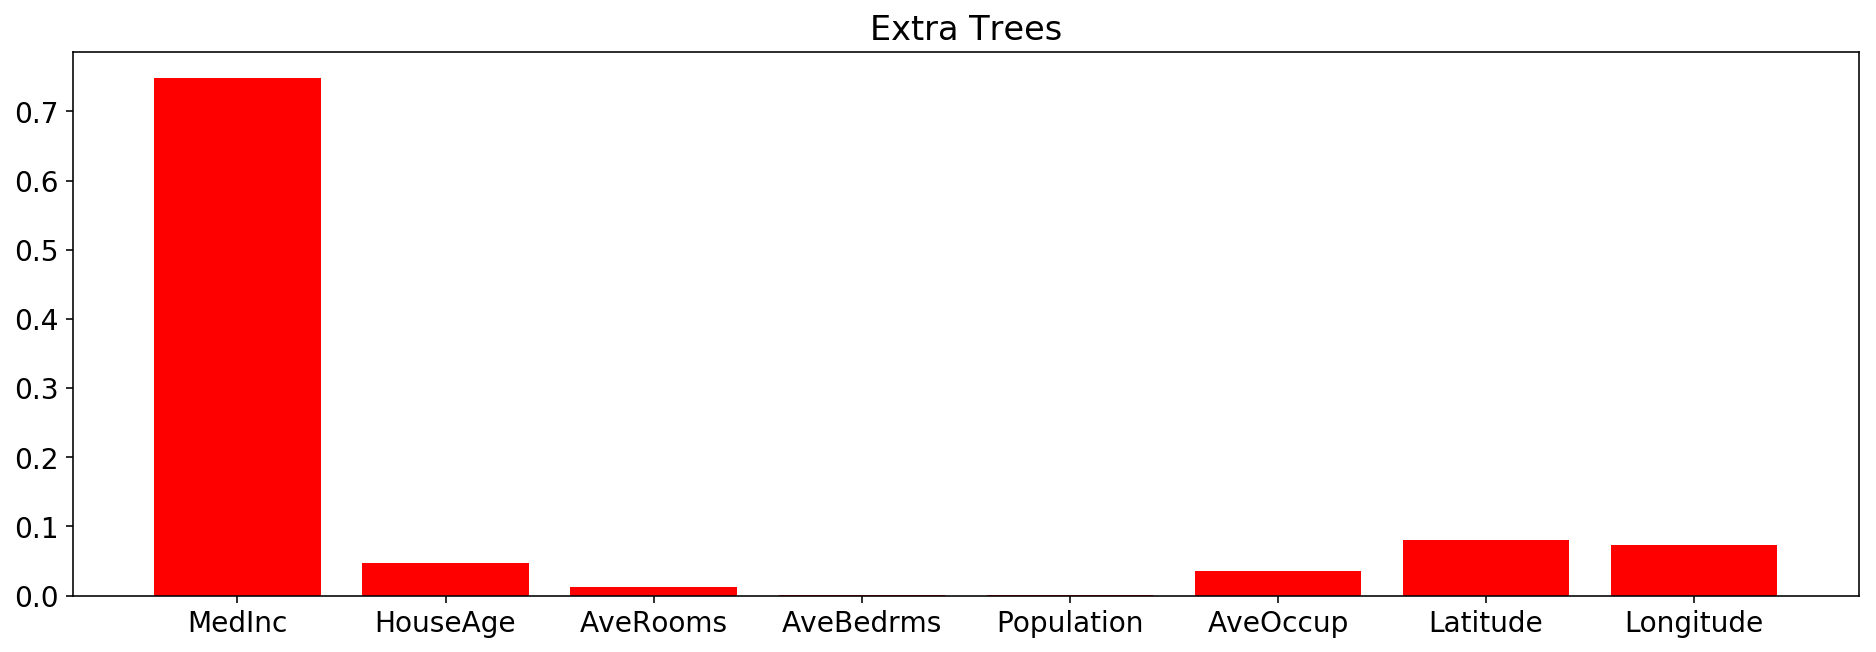

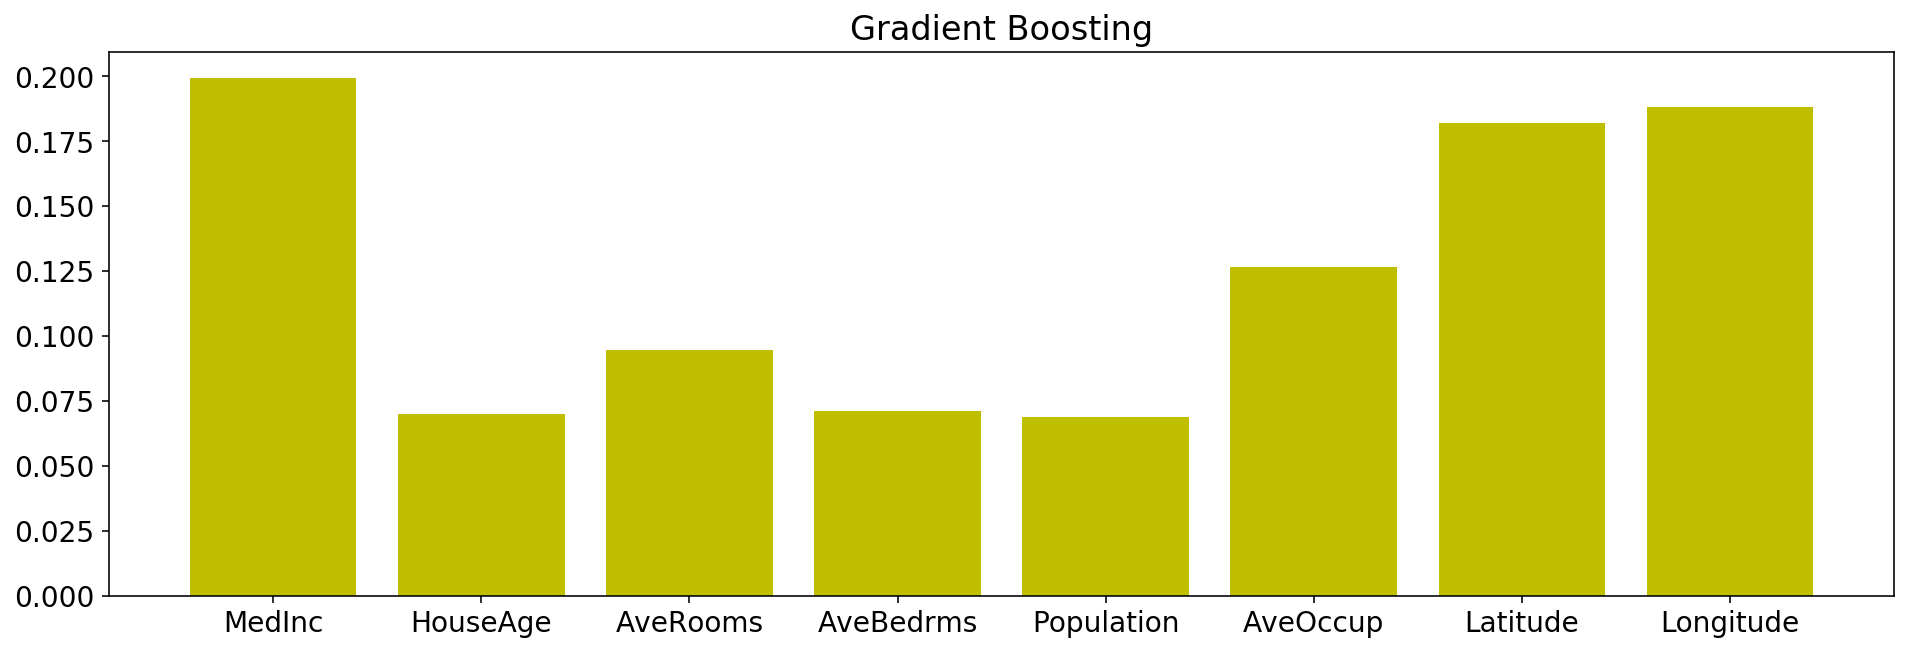

In [254]:
RF_feat_imp = grid_RF.best_estimator_.feature_importances_
ET_feat_imp = grid_ET.best_estimator_.feature_importances_
GB_feat_imp = grid_GB.best_estimator_.feature_importances_

plt.figure(figsize=(16, 5))
plt.title("Random Trees")
plt.bar(cal_housing.feature_names,RF_feat_imp,color="b")

plt.figure(figsize=(16, 5))
plt.title("Extra Trees")
plt.bar(cal_housing.feature_names,ET_feat_imp,color="r")

plt.figure(figsize=(16, 5))
plt.title("Gradient Boosting")
plt.bar(cal_housing.feature_names,GB_feat_imp,color="y")

# Question 4

Competition time! Use any model you want (and understand) to make the best model you can to predict the target in the below dataset.

Each student's submission will be ranked by:
* their performance (using [AUC ROC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) as metric) and
* how well they did at predicting their generalisation error.

Your final rank will be the average of your two ranks.

To evaluate how good you did at predicting your generalisation error Tim will release a fresh test data set after the hand-in deadline. You can then re-run your trained classifier on that data and score its performance. We will rank students by the difference between that score and their predicted score.

You can read in the data using the `pandas` library. The final column of the file contains the target (zero or one).

In [316]:
import pandas as pd

# you might have to adjust the path to the dataset
df_train = pd.read_csv("../../data/challenge-train.csv", header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.000576,0.999939,12.769232,0.584357,0.136273,13.359463,3.358099,14655.587891,0.005370,0.041032,...,58935.695312,74241.648438,4598.116699,2.897916,2.932629,3.193417,267,-99,0.381424,0
1,0.001807,0.999996,18.585171,0.368892,0.054991,3.600483,6.781577,4145.290527,0.030382,0.034570,...,20553.839844,12501.964844,28162.607422,3.584545,3.010242,3.322494,128,1,0.781520,1
2,0.000858,0.999304,4.794842,0.149876,0.172385,16.130068,3.723242,4936.734375,0.017344,0.027622,...,7566.020020,11801.971680,16086.186523,2.700943,2.920070,2.407294,254,-99,0.508650,0
3,0.001519,0.999969,15.656528,0.312301,0.125831,8.113082,5.763765,4948.376465,0.035185,0.038973,...,19161.880859,18598.472656,17658.548828,3.108439,2.932674,3.164568,531,-99,0.682114,0
4,0.000936,0.999978,8.998086,0.475861,0.065347,3.863127,3.675261,4757.155762,0.022795,0.046165,...,12651.365234,33099.660156,10722.979492,2.873017,3.074762,4.136894,160,5,0.633693,1


In [317]:
# convert the pandas dataframe to a numpy array
# make sure you do not include the final column
# in your training data (X) but store it as target (y)
X = df_train.as_matrix()[:, :-1]
y = df_train.as_matrix()[:, -1]

In [318]:
X.shape

(45000, 48)

In [319]:
X = np.delete(X, 46, axis =1)

In [320]:
X.shape

(45000, 47)

In [321]:
print(X[:, 46])

[0.38142401 0.78152043 0.50865024 ... 0.41782987 0.41490647 0.25543493]


In [322]:
y.shape

(45000,)

In [323]:
print(y)

[0. 1. 0. ... 1. 0. 0.]


In [328]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

param_distributions = {'n_estimators':np.arange(100, 400, 20),
                       'max_leaf_nodes':np.arange(2, 51, 8),
                       'max_depth':np.arange(1, 20, 2), 
                       'max_features':np.arange(1, 48, 2)} 

param_search = RandomizedSearchCV(RandomForestClassifier(bootstrap=True),param_distributions,cv=7)
param_search.fit(X_train,y_train)

RandomizedSearchCV(cv=7, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340,
       360, 380]), 'max_leaf_nodes': array([ 2, 10, 18, 26, 34, 42, 50]), 'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]), 'max_features': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
    

In [329]:
print("best parameters", param_search.best_params_)
print("best score", param_search.best_score_)

best parameters {'n_estimators': 120, 'max_leaf_nodes': 42, 'max_features': 37, 'max_depth': 11}
best score 0.8822539682539683


In [330]:
print("test score", param_search.best_estimator_.score(X_test,y_test))

test score 0.8811851851851852
